In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
from sklearn.metrics import silhouette_score

In [2]:
%matplotlib inline

In [3]:
data = pd.read_csv(r"C:\Users\PRACHI TIWARI\OneDrive\Documents\Customer_data.csv")

In [4]:
print("Dataset Overview:")
print(data.info())
print("\nSample Data:")
print(data.head())

Dataset Overview:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10 entries, 0 to 9
Data columns (total 19 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   Customer_id               10 non-null     int64 
 1   Age                       10 non-null     int64 
 2   Gender                    10 non-null     object
 3   Income                    10 non-null     int64 
 4   Location                  10 non-null     object
 5   Occupation                10 non-null     object
 6   Marital_Status            10 non-null     object
 7   Total_Spend               10 non-null     int64 
 8   Purchase_Frequency        10 non-null     int64 
 9   Last_Purchase_Date        10 non-null     object
 10  Days_Since_Last_Purchase  10 non-null     int64 
 11  Number_of_Purchases       10 non-null     int64 
 12  Average_Order_Value       10 non-null     int64 
 13  Preferred_Category        10 non-null     object
 14  Discount_Se

In [5]:
data.fillna(data.median(numeric_only=True), inplace=True)

In [6]:
print("Available columns in the dataset:")
print(data.columns.tolist())

Available columns in the dataset:
['Customer_id', 'Age ', 'Gender', 'Income ', 'Location ', 'Occupation', 'Marital_Status ', 'Total_Spend ', 'Purchase_Frequency', 'Last_Purchase_Date', 'Days_Since_Last_Purchase', 'Number_of_Purchases', 'Average_Order_Value ', 'Preferred_Category', 'Discount_Sensitivity', 'Loyality_Program_Member ', 'Brand_Affinity', 'Channel_Preference', 'Customer_Rating']


In [7]:
categorical_columns = ['Gender', 'Occupation','Brand_Affinity', 'Marital_Status','Loyality_Program_Member', 'Discount_Sensitivity',
                       'Preferred_Category', 'Location','Channel_Preference'] 

In [8]:
categorical_columns = [col for col in categorical_columns if col in data.columns]
print("Filtered categorical columns:", categorical_columns)


Filtered categorical columns: ['Gender', 'Occupation', 'Brand_Affinity', 'Discount_Sensitivity', 'Preferred_Category', 'Channel_Preference']


In [9]:
label_encoder = LabelEncoder()
for col in categorical_columns:
    data[col] = label_encoder.fit_transform(data[col])


In [10]:

print([col for col in data.columns if 'loc' in col.lower()])


['Location ']


In [11]:
print("Available columns in the DataFrame:")
print(data.columns.tolist())


Available columns in the DataFrame:
['Customer_id', 'Age ', 'Gender', 'Income ', 'Location ', 'Occupation', 'Marital_Status ', 'Total_Spend ', 'Purchase_Frequency', 'Last_Purchase_Date', 'Days_Since_Last_Purchase', 'Number_of_Purchases', 'Average_Order_Value ', 'Preferred_Category', 'Discount_Sensitivity', 'Loyality_Program_Member ', 'Brand_Affinity', 'Channel_Preference', 'Customer_Rating']


In [12]:
numerical_columns = [
    'Age', 'Income', 'Total_Spend', 'Purchase_Frequency',
    'Days_Since_Last_Purchase', 'Number_of_Purchases',
    'Average_Order_Value', 
    'Loyality_Program_Member', 'Brand_Affinity', 'Customer_Rating'
]

# Checking which columns are missing
existing_columns = [col for col in numerical_columns if col in data.columns]
missing_columns = [col for col in numerical_columns if col not in data.columns]

print("Existing columns:", existing_columns)
print("Missing columns:", missing_columns)


Existing columns: ['Purchase_Frequency', 'Days_Since_Last_Purchase', 'Number_of_Purchases', 'Brand_Affinity', 'Customer_Rating']
Missing columns: ['Age', 'Income', 'Total_Spend', 'Average_Order_Value', 'Loyality_Program_Member']


In [13]:
numerical_columns = existing_columns


In [14]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
data[numerical_columns] = scaler.fit_transform(data[numerical_columns])


In [16]:
print("Processed Data Preview:")
print(data.head())

Processed Data Preview:
   Customer_id  Age   Gender  Income  Location   Occupation Marital_Status   \
0          101    25       1    25000     India           4          Single   
1          102    50       0    30000   America           1         Married   
2          103    30       1    15000  Pakistan           2          Single   
3          104    45       0    40000    Africa           0          Single   
4          105    35       1    20000   England           3         Married   

   Total_Spend   Purchase_Frequency Last_Purchase_Date  \
0          1000           -1.109653         16/12/2024   
1          1500            1.451085         14/12/2024   
2          2000            1.024295         12/12/2024   
3          1200            0.597505         20/12/2024   
4          1800           -0.682863         25/12/2024   

   Days_Since_Last_Purchase  Number_of_Purchases  Average_Order_Value   \
0                 -0.870388             1.393261                   100   
1   

In [17]:
inertia = []
k_values = range(2, 11)

for k in k_values:
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(data[numerical_columns])
    inertia.append(kmeans.inertia_)


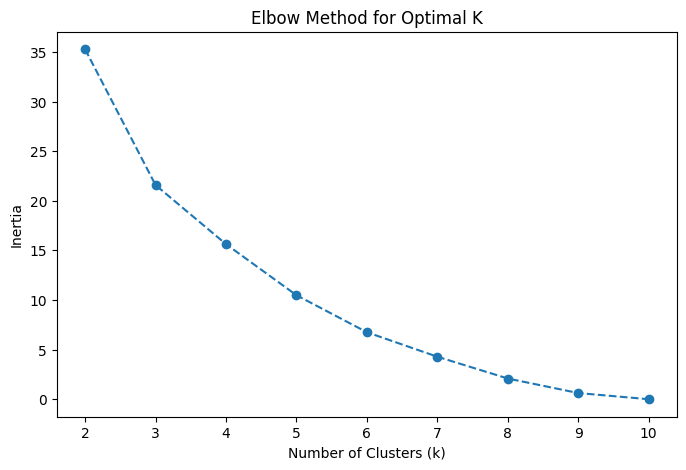

In [18]:
plt.figure(figsize=(8, 5))
plt.plot(k_values, inertia, marker='o', linestyle='--')
plt.title('Elbow Method for Optimal K')
plt.xlabel('Number of Clusters (k)')
plt.ylabel('Inertia')
plt.show()

In [19]:
kmeans = KMeans(n_clusters=4, random_state=42)
data['Cluster'] = kmeans.fit_predict(data[numerical_columns])

In [20]:
print("Clustered Data Sample:")
print(data[['Customer_id', 'Cluster']].head())

Clustered Data Sample:
   Customer_id  Cluster
0          101        2
1          102        1
2          103        0
3          104        0
4          105        1


In [21]:
pca = PCA(n_components=2)
pca_result = pca.fit_transform(data[numerical_columns])


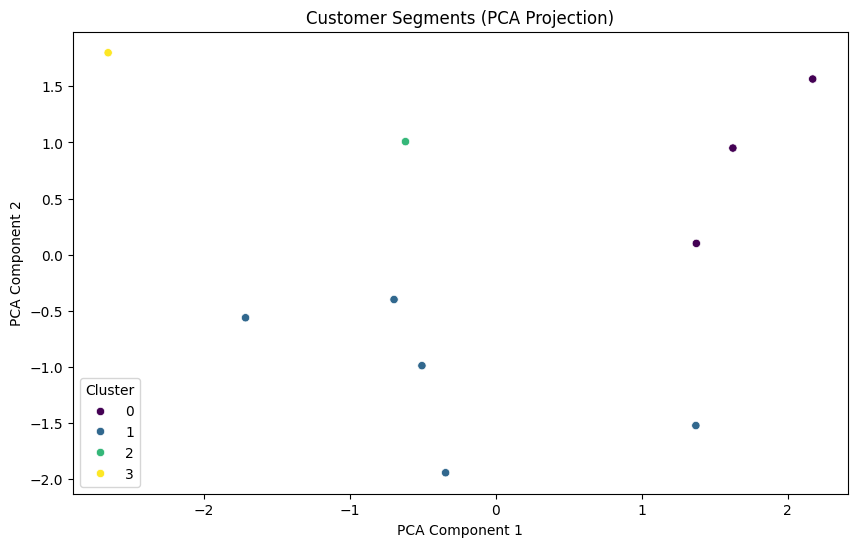

In [22]:
plt.figure(figsize=(10, 6))
sns.scatterplot(x=pca_result[:, 0], y=pca_result[:, 1], hue=data['Cluster'], palette='viridis')
plt.title('Customer Segments (PCA Projection)')
plt.xlabel('PCA Component 1')
plt.ylabel('PCA Component 2')
plt.legend(title='Cluster')
plt.show()

In [26]:
print(data.dtypes)

numeric_columns = data.select_dtypes(include=['number']).columns
cluster_summary = data.groupby('Cluster')[numeric_columns].mean()
print("Cluster Summary:")
print(cluster_summary)




Customer_id                   int64
Age                           int64
Gender                        int64
Income                        int64
Location                     object
Occupation                    int64
Marital_Status               object
Total_Spend                   int64
Purchase_Frequency          float64
Last_Purchase_Date           object
Days_Since_Last_Purchase    float64
Number_of_Purchases         float64
Average_Order_Value           int64
Preferred_Category            int64
Discount_Sensitivity          int64
Loyality_Program_Member      object
Brand_Affinity              float64
Channel_Preference            int64
Customer_Rating             float64
Cluster                       int32
dtype: object
Cluster Summary:
         Customer_id       Age     Gender  Income   Occupation  Total_Spend   \
Cluster                                                                        
0              105.0  38.333333  0.333333  35000.0    1.333333        1900.0   
1        